In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
#from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Modelos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB


In [78]:
dataset = pd.read_csv('assets/train.csv')

In [79]:
datatest = pd.read_csv('assets/test.csv')

In [80]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Análise Exploratória

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Podemos perceber que o datas set possui 7 features categóricas e 6 numéricas. 
E vários dados faltantes em quase todas as features, pois temos 8693 dados não nulos na coluna "Transported".

In [82]:
print('DADOS FALTANTES DO TREINO:')
print(dataset.isna().sum())
print('')
print('DADOS FALTANTES DO TESTE:')
print(datatest.isna().sum())

DADOS FALTANTES DO TREINO:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

DADOS FALTANTES DO TESTE:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


Primeiramente vamos fazer a análise exploratória dos dados, isto porque teremos uma noção melhor dos dados como um todo antes de lidar com estes dados faltantes.

## Análise dos dados numéricos.

Text(0.5, 0, 'Idade em anos')

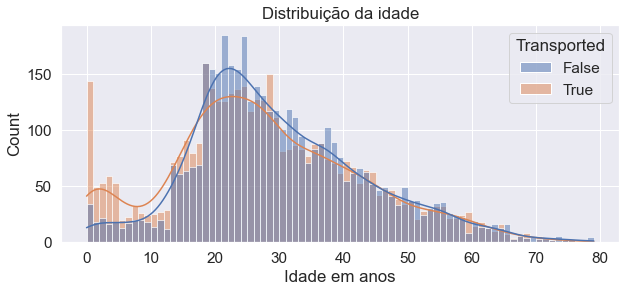

In [83]:
plt.figure(figsize=(10,4))
sns.histplot(data=dataset, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Distribuição da idade')
plt.xlabel('Idade em anos')

Podemos perceber que pessoas mais jovens tiveram mais chances de serem tranpostadas do que as mais velhas. 
Pessoas entre 20 e 30 anos tiveram menos chances de serem tranpostadas. 

Criarei uma nova coluna separando as idades por grupos. 

In [84]:
dataset['Age_group']=np.nan
dataset.loc[dataset['Age']<=12,'Age_group']= 0
dataset.loc[(dataset['Age']>12) & (dataset['Age']<18),'Age_group']=1
dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25),'Age_group']=2
dataset.loc[(dataset['Age']>25) & (dataset['Age']<=30),'Age_group']=3
dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age_group']=4
dataset.loc[dataset['Age']>50,'Age_group']=5


datatest['Age_group']=np.nan
datatest.loc[datatest['Age']<=12,'Age_group']=0
datatest.loc[(datatest['Age']>12) & (datatest['Age']<18),'Age_group']=1
datatest.loc[(datatest['Age']>=18) & (datatest['Age']<=25),'Age_group']=2
datatest.loc[(datatest['Age']>25) & (datatest['Age']<=30),'Age_group']=3
datatest.loc[(datatest['Age']>30) & (datatest['Age']<=50),'Age_group']=4
datatest.loc[datatest['Age']>50,'Age_group']=5

Text(0.5, 0, 'Grupo das idades')

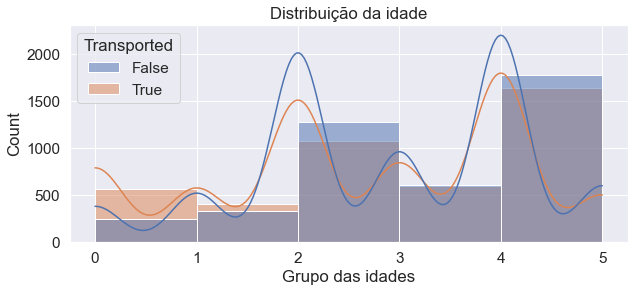

In [85]:
plt.figure(figsize=(10,4))

sns.histplot(data=dataset, x='Age_group', hue='Transported', binwidth=1, kde=True)
plt.title('Distribuição da idade')
plt.xlabel('Grupo das idades')

Explorando as Features de gastos.

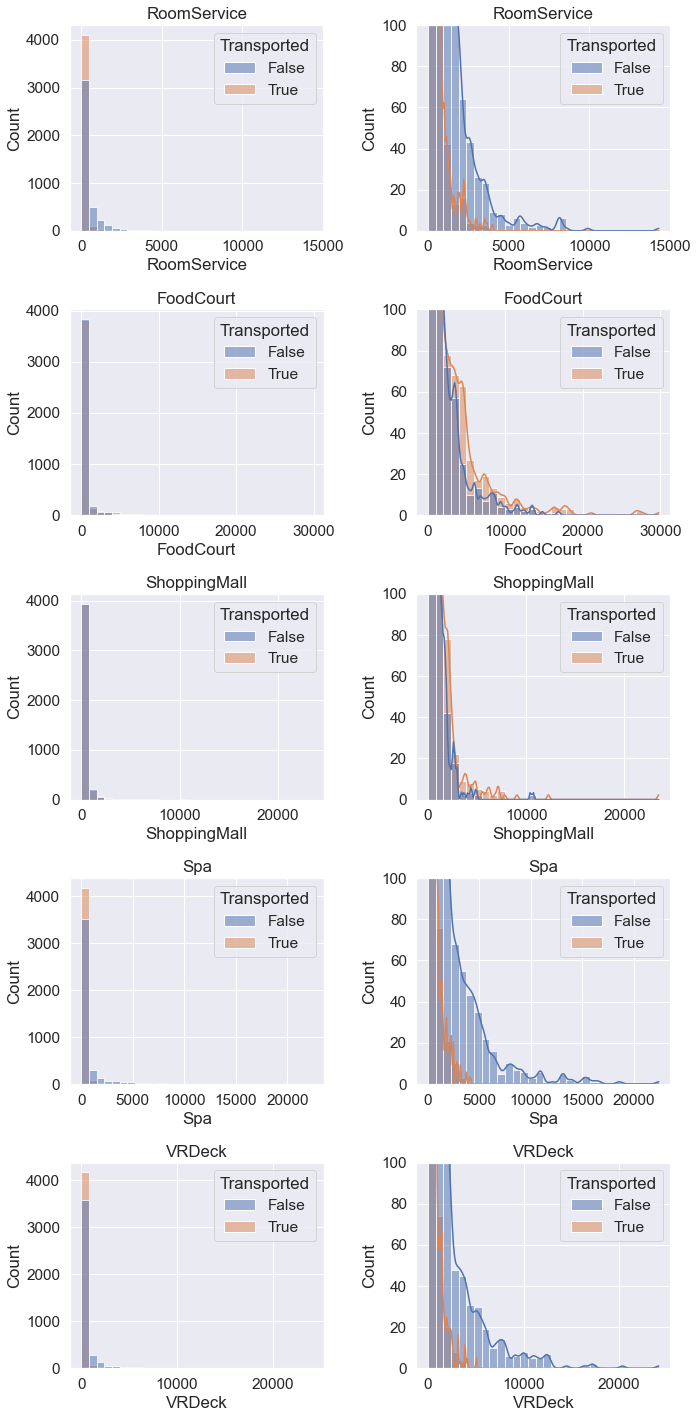

In [86]:
# Features de gastos
gastos_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(gastos_feats):
    # Plot normal
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=dataset, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Plot truncado
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=dataset, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  
plt.show()

Podemos perceber algumas coisas:
- A maioria das pessoas não gastaram dinheiro. 
- As distribuições de RomService, Spa e VRDeck são diferentes das outras, pois nestes casos percebe-se que as pessoas que gastaram menos tiveram uma tendência maior de serem transpostadas.

Criarei duas novas features, uma com o total gasto por cada pessoa e uma binária se a pessoa gastou ou não.

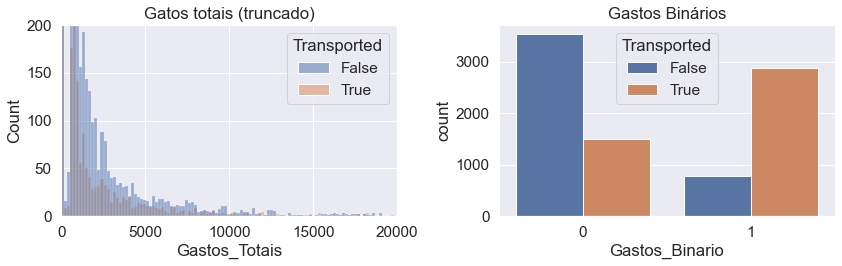

In [87]:
dataset['Gastos_Totais']=dataset[gastos_feats].sum(axis=1)
dataset['Gastos_Binario']=(dataset['Gastos_Totais']==0).astype(int)

# New features - test set
datatest['Gastos_Totais']=datatest[gastos_feats].sum(axis=1)
datatest['Gastos_Binario']=(datatest['Gastos_Totais']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=dataset, x='Gastos_Totais', hue='Transported', bins=200)
plt.title('Gatos totais (truncado)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=dataset, x='Gastos_Binario', hue='Transported')
plt.title('Gastos Binários')
fig.tight_layout()

## Análise dos dados Categóricos  

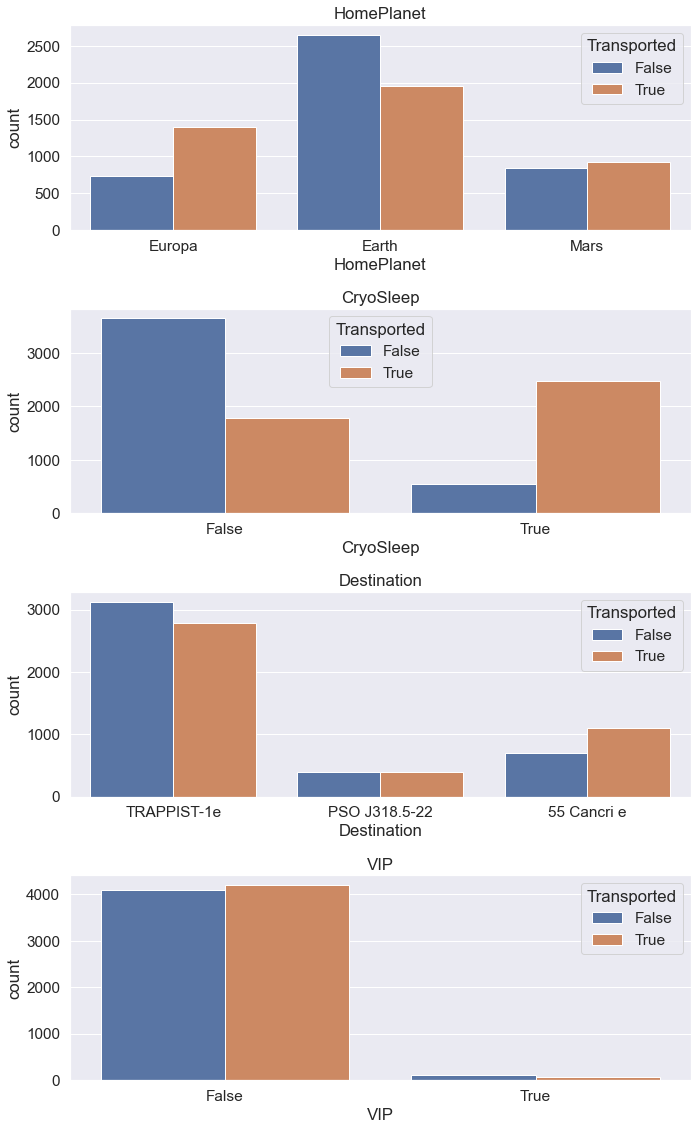

In [88]:
# Features Categoricas
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=dataset, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  
plt.show()

Em relaçao ao planeta de origem podemos ver que:
- Quem vem do planeta Europa tem mais chances de ser tranportado.
- Quem vem do planeta Terra tem menos chances de ser transportado.
- Quem vem de Marte tem chances equilibradas.

Em relação ao estado de Cryosleep:
- Quem estava em CryoSleep tiveram bem mais chances de serem transportados. 

Isto mostra que esssa feature deve ser muito importante no modelo.

Em relação ao destino da viagem as variavéis parecem ser equilibradas. 

Na feature VIP podemos perceber que a grande maioria é de false. Não irei usar essa features para não gerar overfiting.